In [1]:
# we’re going to do employee attrition prediction i.e. predicting that when will employee leave the current company (or will resign from the current company) and we will do this using several machine learning algorithms (basically 6 ML algorithms)

In [2]:
#Need of Employee Attrition prediction

# Managing workforce: If the supervisors or HR came to know about some employees that they will be planning to leave the company then they could get in touch with those employees which can help them to stay back or they can manage the workforce by hiring the new alternative of those employees.
# Smooth pipeline: If all the employees in the current project are working continuously on a project then the pipeline of that project will be smooth but if suppose one efficient asset of the project(employee) suddenly leave that company then the workflow will be not so smooth
# Hiring Management: If HR of one particular project came to know about the employee who is willing to leave the company then he/she can manage the number of hiring and they can get the valuable asset whenever they need so for the efficient flow of work.

In [3]:
#Table of content:

# Importing libraries
# Data exploration
# Data cleaning
# Splitting data (train test split)

# Model development applying 6-ML algorithms:
# i) Logistic Regression
# ii) Decision tree
# iii) KNN
# iv) SVM
# v) Random Forest
# vi) Naive Bayes

# Saving model

In [4]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import accuracy_score

# Reading the dataset

In [5]:
df = pd.read_csv(r'C:\Users\DeLL\Downloads\Table_1.csv')

In [6]:
df.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Yes,Left
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay


In [7]:
# df.set_index('table id', inplace=True) # code to drop index # Here , in thus code , we used table _id as an index rather than already existing index

In [8]:
df.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Yes,Left
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay


# now , let's do Data exploration

In [9]:
df.shape

(902, 16)

In [10]:
df.isnull().sum()

table id                 0
name                     0
phone number             0
Location                 0
Emp. Group               0
Function                 0
Gender                   0
Tenure                   0
Tenure Grp.              0
Experience (YY.MM)       4
Marital Status           0
Age in YY.               0
Hiring Source            0
Promoted/Non Promoted    0
Job Role Match           2
Stay/Left                0
dtype: int64

In [11]:
# As we can see that there are null values in the Experience and Job role so we have to drop them.

In [12]:
df.dropna(axis=0 , inplace=True)

In [13]:
# so , now we can see there is no any single null value present in dataset
df.isnull().sum()

table id                 0
name                     0
phone number             0
Location                 0
Emp. Group               0
Function                 0
Gender                   0
Tenure                   0
Tenure Grp.              0
Experience (YY.MM)       0
Marital Status           0
Age in YY.               0
Hiring Source            0
Promoted/Non Promoted    0
Job Role Match           0
Stay/Left                0
dtype: int64

In [14]:
df.shape
# so here we can see the new number of rows after droping null values containing rows

(896, 16)

# Let’s explore all the categorical values and visualize them

In [15]:
# Now, we will use the value_counts function so that we can get the unique values from every categorical type of data.

# (1) Gender

In [116]:
gender_dict = df["Gender "].value_counts()
gender_dict

Male      656
Female    234
other       6
Name: Gender , dtype: int64

In [17]:
# Understanding the balancing of the Gender column visually

<AxesSubplot:title={'center':'Count of different gender'}>

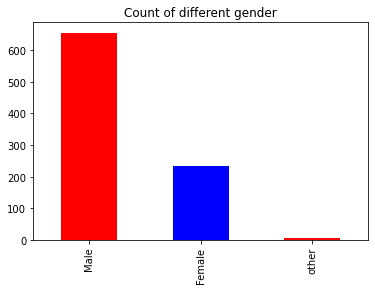

In [18]:
df['Gender '].value_counts().plot(kind='bar',color=['red','blue'],title="Count of different gender")

In [19]:
# Here, from the chart, it’s visible that the count of males is more than another category of the gender.

# Male: 655, Female: 234 , Other: 6

# Now, let’s figure out that how gender could be the reason for employees to leave the company or to stay in using crosstab() function

(array([0, 1, 2]),
 [Text(0, 0, 'Female'), Text(1, 0, 'Male'), Text(2, 0, 'other')])

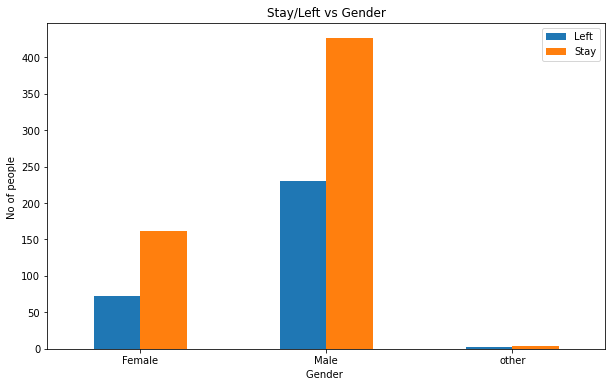

In [20]:
#Create a plot for crosstab
# crosstab() function is used to compute a simple cross tabulation of two (or more) factors

pd.crosstab(df['Gender '],df['Stay/Left']).plot(kind="bar",figsize=(10,6))
plt.title("Stay/Left vs Gender")
plt.ylabel("No of people ")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

In [21]:
# Here, from the chart it’s visible that it heavily depends on males, also we can see that it’s either male, female or others but more number of them are staying in the company.

# (2) Promotion (Promoted/ Non-Promoted)

In [22]:
promoted_dict = df["Promoted/Non Promoted"].value_counts()
promoted_dict

Promoted        457
Non Promoted    439
Name: Promoted/Non Promoted, dtype: int64

<AxesSubplot:title={'center':'Promoted and Non Promoted'}>

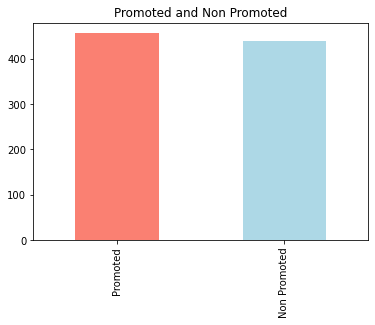

In [23]:
df['Promoted/Non Promoted'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Promoted and Non Promoted")

In [24]:
# now, from the above chart, we can see that when it comes to Promoted and Non-Promoted employees it’s quiet in balanced number

# Now, let’s figure out that how promotion could be the reason for employees to leave the company or to stay in

(array([0, 1]), [Text(0, 0, 'Non Promoted'), Text(1, 0, 'Promoted')])

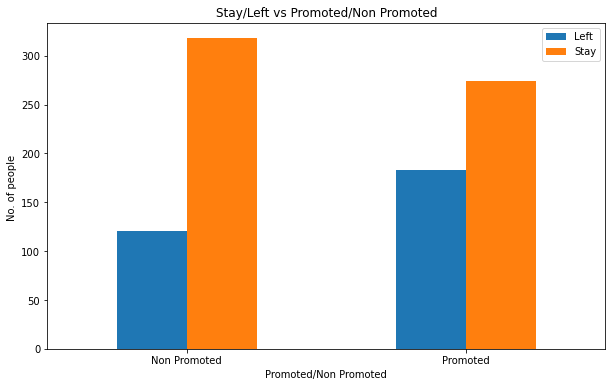

In [25]:
#Create a plot for crosstab

pd.crosstab(df['Promoted/Non Promoted'],df['Stay/Left']).plot(kind="bar",figsize=(10,6))
plt.title("Stay/Left vs Promoted/Non Promoted")
plt.ylabel("No. of people ")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

In [26]:
# Here, from the chart, it’s visible that the ones who are not promoted are leaving the company more as compared to the ones who are promoted which is also an obvious thing likely to happen.

# (3)  Function (Operation/ Support/ Sales)

In [27]:
func_dict = df["Function"].value_counts()
func_dict

Operation    832
Support       52
Sales         12
Name: Function, dtype: int64

<AxesSubplot:title={'center':'Functions in organization'}>

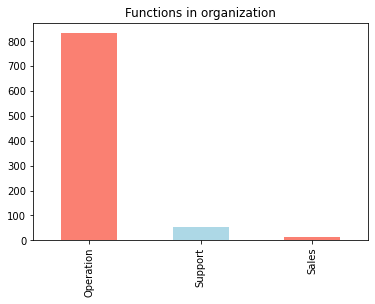

In [28]:
df['Function'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Functions in organization")

In [29]:
# Now, we can see that majority of the function performed by employees are Operation itself then support and at the last it’s sales.

# Now, let’s figure out that how function could be the reason for employees to leave the company or to stay in

(array([0, 1, 2]),
 [Text(0, 0, 'Operation'), Text(1, 0, 'Sales'), Text(2, 0, 'Support')])

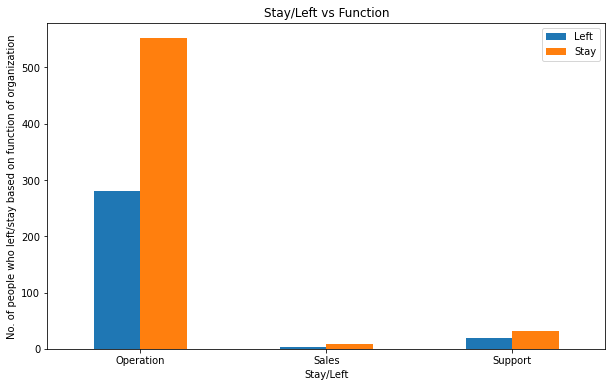

In [30]:
#Create a plot for crosstab

pd.crosstab(df['Function'],df['Stay/Left']).plot(kind="bar",figsize=(10,6))
plt.title("Stay/Left vs Function")
plt.xlabel("Stay/Left")
plt.ylabel("No. of people who left/stay based on function of organization")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

In [31]:
# Here, in the chart, we can see that the maximum number of employees are in the operation section and a high number of employees in the same section are staying in the company

# (4) Hiring Source (Direct/ Agency/ Employee referral)

In [32]:
Hiring_dict = df["Hiring Source"].value_counts()
Hiring_dict

Direct               709
Agency               116
Employee Referral     71
Name: Hiring Source, dtype: int64

# (5) Marital Status (Single/ Married/ Seperated/ Div./ NTBD)

In [33]:
Marital_dict = df["Marital Status"].value_counts()
print(Marital_dict)

Single    534
Marr.     356
Div.        2
NTBD        2
Sep.        2
Name: Marital Status, dtype: int64


# (6) Employee group

In [34]:
Emp_dict = df["Emp. Group"].value_counts()
Emp_dict['other group'] = 1
print(Emp_dict)

B1             537
B2             276
B3              59
B0               8
B4               7
B5               4
B7               2
B6               1
C3               1
D2               1
other group      1
Name: Emp. Group, dtype: int64


# (7) Job role match (Yes/ No)

In [35]:
job_dict = df["Job Role Match"].value_counts()
job_dict

Yes    481
No     415
Name: Job Role Match, dtype: int64

<AxesSubplot:title={'center':'Job Role Match'}>

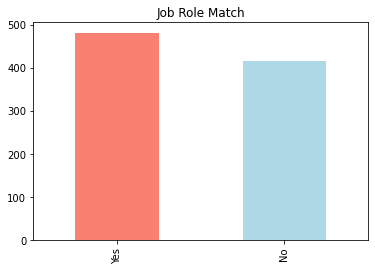

In [36]:
df['Job Role Match'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Job Role Match")

In [37]:
# Now, we can see that majority of the employees have their correct role in Job

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

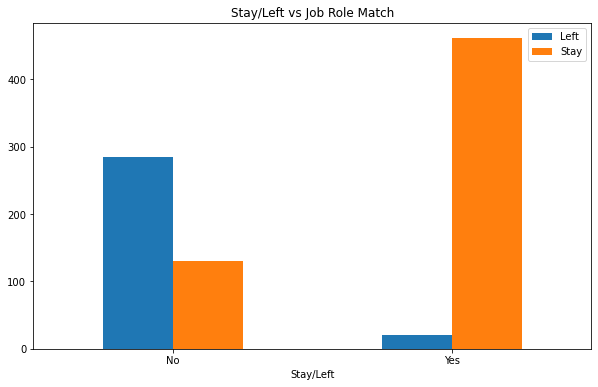

In [38]:
#Create a plot for crosstab

pd.crosstab(df['Job Role Match'], df['Stay/Left']).plot(kind="bar",figsize=(10,6))
plt.title("Stay/Left vs Job Role Match")
plt.xlabel("Stay/Left")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

In [39]:
# Here, in the above chart, we can see that the number of employees who got the correct job role is staying in the company rather than the ones who don’t have their right job role.

# (8) Tenure group 

In [40]:
tenure_dict = df["Tenure Grp."].value_counts()
print(tenure_dict)

> 1 & < =3    626
< =1          270
Name: Tenure Grp., dtype: int64


# Now let’s visualize some continuous data using jointplot() function

# (1) Its Age vs stay/left

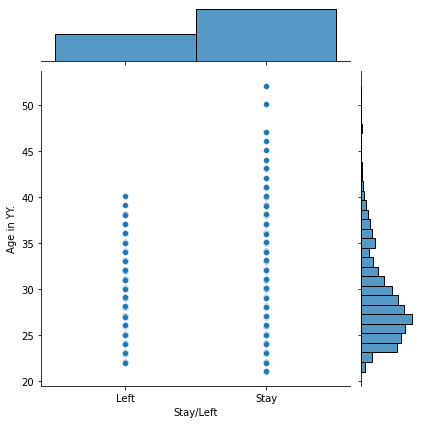

In [41]:

sns.jointplot(x='Stay/Left',y='Age in YY.',data=df)

#The function jointplot() in Seaborn library creates a scatter plot with two histograms at the top and right margins of the graph by default. 
# A Jointplot comprises three plots. Out of the three, one plot displays a bivariate graph which shows how the dependent variable(Y) varies with the independent variable(X). Another plot is placed horizontally at the top of the bivariate graph and it shows the distribution of the independent variable(X). The third plot is placed on the right margin of the bivariate graph with the orientation set to vertical and it shows the distribution of the dependent variable(Y). It is very helpful to have univariate and bivariate plots together in one figure. This is because the univariate analysis focuses on one variable, it describes, summarizes and shows any patterns in your data and the bivariate analysis explores the relationship between two variables and also describes the strength of their relationship

In [42]:
#In the above graph, we can see that the ones who are having more age are staying back in the company rather than the ones who have comparatively less age.

# (2) Its Experience vs stay/left

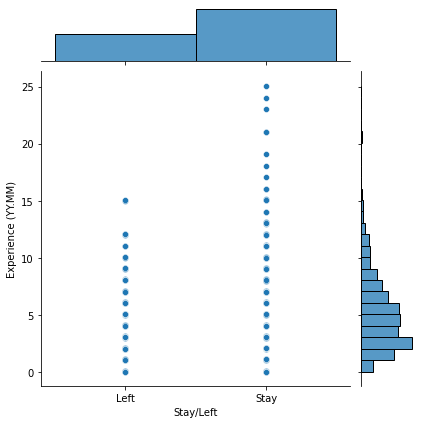

In [43]:
sns.jointplot(x='Stay/Left',y='Experience (YY.MM)',data=df)

In [44]:
# Here in the above graph, we can see that the employees who have got more experience will be staying back in the company rather than the ones who have comparatively less experience.

In [45]:
# Here, first, we are trying to get the correlation between variables where the dataset is not processed that’s why we are not able to see the results in the manner we want to, but later, we will see the better correlation plot with the help of cleaned data.

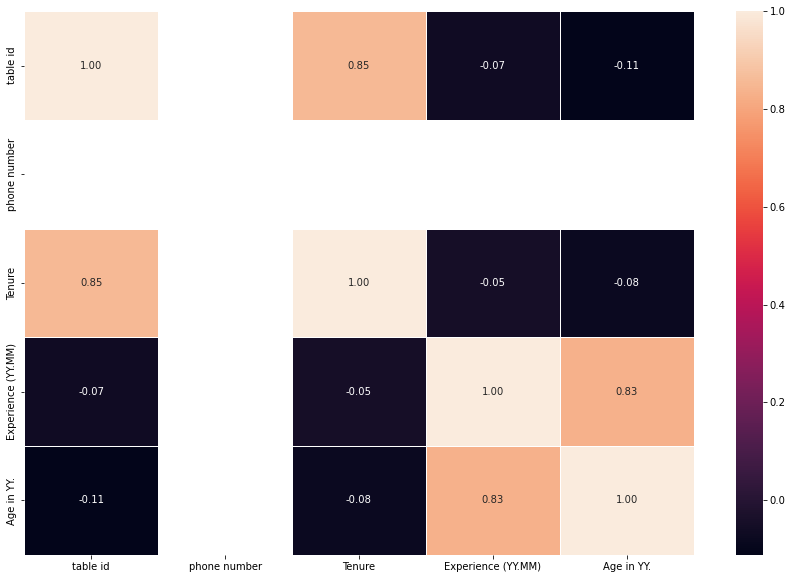

In [46]:
# Let's make our correlation matrix visual
# A correlation matrix is simply a table which displays the correlation coefficients for different variables. 
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

# Now , lets start Data cleaning

In [47]:
df

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Yes,Left
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,897,Rahul,9876544345,Vijayawada,B1,Operation,Male,0.03,< =1,0.03,Single,24.06,Direct,Non Promoted,Yes,Stay
897,898,Rahul,9876544345,Vijayawada,B1,Operation,Female,0.03,< =1,0.03,Single,21.09,Direct,Non Promoted,Yes,Stay
898,899,Rahul,9876544345,Vijayawada,B1,Operation,Female,0.03,< =1,0.03,Single,22.02,Direct,Non Promoted,Yes,Left
900,901,Rahul,9876544345,Vijayawada,B1,Operation,Female,0.03,< =1,0.03,Single,22.02,Direct,Non Promoted,Yes,Stay


# Now , lets convert the Non-Numerical values into Numerical Values using Label Encoder function

In [48]:
# from sklearn import preprocessing
# le= preprocessing.LabelEncoder()
# df["Location_numval"]=le.fit(df["Location"]).transform(df["Location"])

In [49]:
# df
# But here the problem of using the label encoder fucntion is that it will assign numerical value for each non - numerical value but we want to assign numerical value individually for few and want to put rest in only single numerical value

In [50]:
# So , that is why we are using this 2nd Method

# So Now, Encoding the locations column (categorized)
# Here , we did not use One hot Encoding here because here number of categorical values are more so if we will use here one hot encoding too then 
# it results to increase the sparsity of data and will reduce the density of data which is not good for making model

In [51]:
# Build a new dictionary (location) to be used to categorize data columns after values are encoded. Here, in location_dict_new we are using integer values instead of the actual region name so that our machine learning model could interpret it.

In [52]:
location_dict = df["Location"].value_counts()
print(location_dict)

location_dict_new = {
    'Chennai':       7,
    'Noida':         6,
    'Bangalore':     5,
    'Hyderabad':     4,
    'Pune':          3,
    'Madurai':       2,
    'Lucknow':       1,
    'other place':   0,
}

print(location_dict_new)

Chennai       255
Noida         236
Bangalore     210
Hyderabad      62
Pune           56
Madurai        29
Lucknow        20
Nagpur         14
Vijayawada      6
Mumbai          4
Gurgaon         3
Kolkata         1
Name: Location, dtype: int64
{'Chennai': 7, 'Noida': 6, 'Bangalore': 5, 'Hyderabad': 4, 'Pune': 3, 'Madurai': 2, 'Lucknow': 1, 'other place': 0}


In [53]:
# Now we will make a function for the location column to make a new column where encoded location values will be there because our machine learning algorithm will only understand int/float values.

In [54]:
def location(x):
    if str(x) in location_dict_new.keys():
        return location_dict_new[str(x)]
    else:
        return location_dict_new['other place']
    
df['New Location'] = df["Location"].apply(location)

df.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left,New Location
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Yes,Left,3
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay,6
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay,5
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay,6
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay,1


# Now, Use get_dummies() function ( or OneHotEncoder function) 
# Here we used the One hot encoding because here number of categorical values are less so we can use here  One hot encoding.
# Remember one thing only 0 or 1 values are assigned in One hot encoding

# One hot encoding provides better resolution of data for the model because it feeds the data into the model in the format of computer language i.e. Binary language (0 or 1)



In [55]:
# get_dummies() function is used for manipulating data, this function is used to convert the categorical values to dummy variables
# dummy variables means suppose we have a feature with 3 non-numerical categorical values then get_dummy function will assign numerical value to each category and then put it as the new features
# Remember one thing only 0 or 1 values are assigned in One hot encoding

In [56]:
# Now , we will use the get_dummies() function for all these below:
# 1) Function
# 2) Hiring Source
# 3) New Marital
# 4) New Gender
# 5) Tenure group

In [57]:
# (1) Function
gen = pd.get_dummies(df["Function"])
gen.head()

,Operation,Sales,Support
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [58]:
# (2) Hiring Source
hr = pd.get_dummies(df["Hiring Source"])
hr.head()

,Agency,Direct,Employee Referral
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [59]:
# (3) Marital Status
# Here, in Mar() function we are using Maritial dictionary keys to convert those categorical values into acceptable type values for our ML models.

In [60]:
def Mar(x):
    if str(x) in Marital_dict.keys() and Marital_dict[str(x)] > 100:
        return str(x)
    else:
        return 'other status'
    
df['New Marital'] = df["Marital Status"].apply(Mar)

df.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left,New Location,New Marital
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Yes,Left,3,Single
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay,6,Marr.
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay,5,Marr.
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay,6,Marr.
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay,1,Marr.


In [61]:
# Using the get_dummies to function for New Marital we are converting categorical values into dummy variables

In [62]:
Mr = pd.get_dummies(df["New Marital"])
Mr.head()

,Marr.,Single,other status
0,0,1,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [63]:
# (4) Promoted/Not Promoted

In [64]:
# Here, with the help of Promoted function, we are converting Promoted and Non promoted values into 1 and 0 respectively for encoding purposes

In [65]:
def Promoted(x):
    if x == 'Promoted':
        return int(1)
    else:
        return int(0)

data_l = df["Promoted/Non Promoted"].apply(Promoted)
df['New Promotion'] = data_l
df.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left,New Location,New Marital,New Promotion
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Yes,Left,3,Single,0
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay,6,Marr.,1
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay,5,Marr.,1
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay,6,Marr.,1
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay,1,Marr.,0


In [66]:
# (5) Employee Group

In [67]:
# Here first, we are creating a dictionary for the employee group and tagging each group to the respective integer values, later we are creating an emp() function where the encoding of the categorical values is done – similar to marital status.

In [68]:
Emp_dict_new = {
    'B1': 4,
    'B2': 3,
    'B3': 2,
    'other group': 1,
}

In [69]:
def emp(x):
    if str(x) in Emp_dict_new.keys():
        return str(x)
    else:
        return 'other group'
 
df['New EMP'] = df["Emp. Group"].apply(emp)
 

emp = pd.get_dummies(df["New EMP"])
df.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left,New Location,New Marital,New Promotion,New EMP
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Yes,Left,3,Single,0,B2
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay,6,Marr.,1,other group
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay,5,Marr.,1,B3
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay,6,Marr.,1,B2
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay,1,Marr.,0,B2


In [70]:
# (4) Job Role Match

In [71]:
# Here, we are using the Job() function where categorical values are Yes and No which needs to be converted into integer values i.e. 1/0 then we are assigning the New Job Role Match.

In [72]:
def Job(x):
    if x == 'Yes':
        return int(1)
    else:
        return int(0)
    
df['New Job Role Match'] = df["Job Role Match"].apply(Job)

df.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),...,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left,New Location,New Marital,New Promotion,New EMP,New Job Role Match
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,...,27.12,Direct,Non Promoted,Yes,Left,3,Single,0,B2,1
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,...,38.08,Direct,Promoted,No,Stay,6,Marr.,1,other group,0
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,...,36.04,Direct,Promoted,Yes,Stay,5,Marr.,1,B3,1
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,...,32.07,Direct,Promoted,Yes,Stay,6,Marr.,1,B2,1
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,...,32.05,Direct,Non Promoted,Yes,Stay,1,Marr.,0,B2,1


In [73]:
# (5) Gender

In [74]:
# Here, we are using the Gen() function using gender_dict (dictionary) which will be encoded first using the dictionary keys, and then the changes will be applied to the dataset based on changes that are done.

In [75]:
def Gen(x):
    if x in gender_dict.keys():
        return str(x)
    else:
        return 'other'

df['New Gender']  = df["Gender "].apply(Gen)

df.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),...,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left,New Location,New Marital,New Promotion,New EMP,New Job Role Match,New Gender
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,...,Direct,Non Promoted,Yes,Left,3,Single,0,B2,1,Male
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,...,Direct,Promoted,No,Stay,6,Marr.,1,other group,0,Male
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,...,Direct,Promoted,Yes,Stay,5,Marr.,1,B3,1,Male
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,...,Direct,Promoted,Yes,Stay,6,Marr.,1,B2,1,Male
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,...,Direct,Non Promoted,Yes,Stay,1,Marr.,0,B2,1,Male


In [76]:
# get_dummies() function for the same purposes for New gender and Tenure groups.

In [77]:
gend = pd.get_dummies(df["New Gender"])
gend.head()

,Female,Male,other
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [78]:
tengrp = pd.get_dummies(df["Tenure Grp."])
tengrp.head()

,< =1,> 1 & < =3
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


# Now, let’s concatenate the columns which are being cleaned, sorted, and manipulated by us as processed data.

In [79]:
dataset = pd.concat([df, hr, Mr, emp, tengrp, gen, gend], axis = 1)
dataset.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),...,B3,other group,< =1,> 1 & < =3,Operation,Sales,Support,Female,Male,other
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,...,0,0,1,0,1,0,0,0,1,0
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,...,0,1,1,0,0,0,1,0,1,0
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,...,1,0,1,0,1,0,0,0,1,0
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,...,0,0,1,0,1,0,0,0,1,0
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,...,0,0,1,0,1,0,0,0,1,0


# code to view all coloumns by side scrolling

In [80]:
pd.set_option('display.max_columns', None)
dataset.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left,New Location,New Marital,New Promotion,New EMP,New Job Role Match,New Gender,Agency,Direct,Employee Referral,Marr.,Single,other status,B1,B2,B3,other group,< =1,> 1 & < =3,Operation,Sales,Support,Female,Male,other
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Yes,Left,3,Single,0,B2,1,Male,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay,6,Marr.,1,other group,0,Male,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay,5,Marr.,1,B3,1,Male,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay,6,Marr.,1,B2,1,Male,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay,1,Marr.,0,B2,1,Male,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0


# code to view all rows and columns by down scrolling

In [112]:
pd.set_option("max_rows", None)
df

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left,New Location,New Marital,New Promotion,New EMP,New Job Role Match,New Gender
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Yes,Left,3,Single,0,B2,1,Male
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay,6,Marr.,1,other group,0,Male
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay,5,Marr.,1,B3,1,Male
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay,6,Marr.,1,B2,1,Male
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay,1,Marr.,0,B2,1,Male
5,6,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,9.01,Marr.,39.09,Direct,Promoted,No,Stay,5,Marr.,1,B3,0,Male
6,7,sid,9876544345,Pune,B2,Operation,Female,0.01,< =1,5.02,Single,28.02,Agency,Promoted,No,Stay,3,Single,1,B2,0,Female
7,8,sid,9876544345,Bangalore,B2,Operation,Male,0.01,< =1,5.11,Marr.,30.11,Agency,Promoted,No,Left,5,Marr.,1,B2,0,Male
8,9,sid,9876544345,Bangalore,B2,Operation,Male,0.02,< =1,6.04,Marr.,33.05,Agency,Promoted,No,Left,5,Marr.,1,B2,0,Male
9,10,sid,9876544345,Chennai,B2,Operation,Male,0.01,< =1,10.01,Div.,41.06,Direct,Promoted,Yes,Stay,7,other status,1,B2,1,Male


In [82]:
dataset.columns

Index(['table id', 'name', 'phone number', 'Location', 'Emp. Group',
       'Function', 'Gender ', 'Tenure', 'Tenure Grp.', 'Experience (YY.MM)',
       'Marital Status', 'Age in YY.', 'Hiring Source',
       'Promoted/Non Promoted', 'Job Role Match', 'Stay/Left', 'New Location',
       'New Marital', 'New Promotion', 'New EMP', 'New Job Role Match',
       'New Gender', 'Agency', 'Direct', 'Employee Referral', 'Marr.',
       'Single', 'other status', 'B1', 'B2', 'B3', 'other group', '< =1',
       '> 1 & < =3', 'Operation', 'Sales', 'Support', 'Female', 'Male',
       'other'],
      dtype='object')

# Let’s drop the columns which are not important anymore

In [83]:
dataset.drop(["table id", "name", "Marital Status","Promoted/Non Promoted","Function","Emp. Group","Job Role Match","Location"
              ,"Hiring Source","Gender ", 'Tenure', 'New Gender', 'New Marital', 'New EMP'],axis=1,inplace=True)

dataset1 = dataset.drop(['Tenure Grp.', 'phone number'], axis = 1)
dataset1.columns

Index(['Experience (YY.MM)', 'Age in YY.', 'Stay/Left', 'New Location',
       'New Promotion', 'New Job Role Match', 'Agency', 'Direct',
       'Employee Referral', 'Marr.', 'Single', 'other status', 'B1', 'B2',
       'B3', 'other group', '< =1', '> 1 & < =3', 'Operation', 'Sales',
       'Support', 'Female', 'Male', 'other'],
      dtype='object')

# As I mentioned, this is the correlation plot on the processed dataset

In [84]:
# Let's make our correlation matrix visual

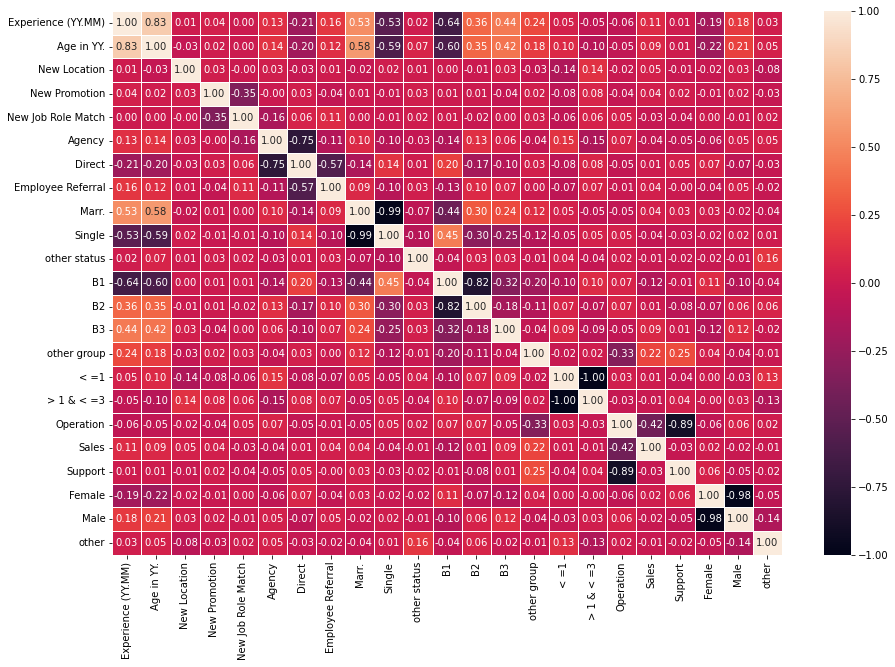

In [85]:
corr_matrix=dataset1.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

In [86]:
# Let’s see our target column 

In [87]:
dataset1['Stay/Left'].head()

0    Left
1    Stay
2    Stay
3    Stay
4    Stay
Name: Stay/Left, dtype: object

# All the values present in it are Numerical values
# and stay/left column is the target variable

In [88]:
dataset1 

,Experience (YY.MM),Age in YY.,Stay/Left,New Location,New Promotion,New Job Role Match,Agency,Direct,Employee Referral,Marr.,Single,other status,B1,B2,B3,other group,< =1,> 1 & < =3,Operation,Sales,Support,Female,Male,other
0,6.08,27.12,Left,3,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
1,13.00,38.08,Stay,6,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0
2,16.05,36.04,Stay,5,1,1,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0
3,6.06,32.07,Stay,6,1,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0
4,7.00,32.05,Stay,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0
5,9.01,39.09,Stay,5,1,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0
6,5.02,28.02,Stay,3,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0
7,5.11,30.11,Left,5,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0
8,6.04,33.05,Left,5,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0
9,10.01,41.06,Stay,7,1,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0


In [89]:
# Saving the cleaned dataset into another CSV file

In [90]:
dataset1.to_csv("processed table.csv")

# Now, from the processed data we have to separate the features and target column again

In [91]:
dataset = pd.read_csv("processed table.csv")
dataset = pd.DataFrame(dataset)
y = dataset["Stay/Left"]
X = dataset.drop("Stay/Left",axis=1)

# Splitting data – Train test split

In [92]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
X_train.head()

,Unnamed: 0,Experience (YY.MM),Age in YY.,New Location,New Promotion,New Job Role Match,Agency,Direct,Employee Referral,Marr.,Single,other status,B1,B2,B3,other group,< =1,> 1 & < =3,Operation,Sales,Support,Female,Male,other
385,388,7.05,30.02,6,0,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0
215,218,3.07,24.03,6,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0
399,402,5.00,29.02,3,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0
411,414,3.08,30.10,6,1,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0
354,357,8.04,29.06,5,1,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0


# Model Development

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

# Initializing the models

In [94]:
# Logistic Regression : C: Inverse of regularization strength (float), random state: (int), solver: sag,saga,liblinear (Here, we are using liblinear).
# Decision trees: Default parameters
# Random forest: Default parameters
# Gaussian Naive Bayes: Default parameters
# K-nearest neighbors: n_neighbors=3 – we can have another number of neighbors too.
# Support vector machines: kernel can be linear, polynomial, RBF, sigmoid. Here we are using a linear kernel function.

In [95]:
lr=LogisticRegression(C = 0.1, random_state = 42, solver = 'liblinear')
dt=DecisionTreeClassifier()
rm=RandomForestClassifier()
knn = KNeighborsClassifier(n_neighbors=3)
svm = svm.SVC(kernel='linear')

In [96]:
# Now, from one block of code, we will check the accuracy of all the model

In [98]:
for a,b in zip([lr,dt,knn,svm,rm],["Logistic Regression","Decision Tree","KNN","SVM","Random Forest"]):
    a.fit(X_train,y_train)
    prediction=a.predict(X_train)
    y_pred=a.predict(X_test)
    score1=accuracy_score(y_train,prediction)
    score=accuracy_score(y_test,y_pred)
    msg1="[%s] training data accuracy is : %f" % (b,score1)
    msg2="[%s] test data accuracy is : %f" % (b,score)
    print(msg1)
    print(msg2)

[Logistic Regression] training data accuracy is : 0.891061
[Logistic Regression] test data accuracy is : 0.855556
[Decision Tree] training data accuracy is : 1.000000
[Decision Tree] test data accuracy is : 0.866667
[KNN] training data accuracy is : 0.796089
[KNN] test data accuracy is : 0.550000
[SVM] training data accuracy is : 0.882682
[SVM] test data accuracy is : 0.838889
[Random Forest] training data accuracy is : 1.000000
[Random Forest] test data accuracy is : 0.883333


# Model Scores ( Testing accuracy)

In [99]:
model_scores={'Logistic Regression':lr.score(X_test,y_test),
             'KNN classifier':knn.score(X_test,y_test),
             'Support Vector Machine':svm.score(X_test,y_test),
             'Random forest':rm.score(X_test,y_test),
              'Decision tree':dt.score(X_test,y_test)
             }
model_scores

{'Logistic Regression': 0.8555555555555555,
 'KNN classifier': 0.55,
 'Support Vector Machine': 0.8388888888888889,
 'Random forest': 0.8833333333333333,
 'Decision tree': 0.8666666666666667}

# Here, we can see that Logistic regression and Random forest have the best accuracy.

# Classification Report of Random forest

In [100]:
from sklearn.metrics import classification_report

rm_y_preds = rm.predict(X_test)

print(classification_report(y_test,rm_y_preds))

              precision    recall  f1-score   support

        Left       0.87      0.77      0.82        62
        Stay       0.89      0.94      0.91       118

    accuracy                           0.88       180
   macro avg       0.88      0.86      0.87       180
weighted avg       0.88      0.88      0.88       180



# Classification Report of Logistic Regression

In [101]:
from sklearn.metrics import classification_report

lr_y_preds = lr.predict(X_test)

print(classification_report(y_test,lr_y_preds))

              precision    recall  f1-score   support

        Left       0.83      0.73      0.78        62
        Stay       0.87      0.92      0.89       118

    accuracy                           0.86       180
   macro avg       0.85      0.82      0.83       180
weighted avg       0.85      0.86      0.85       180



# Model Comparison based on the accuracy

In [102]:
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare

,Logistic Regression,KNN classifier,Support Vector Machine,Random forest,Decision tree
accuracy,0.855556,0.55,0.838889,0.883333,0.866667


# Visualize the accuracy of each model

<AxesSubplot:>

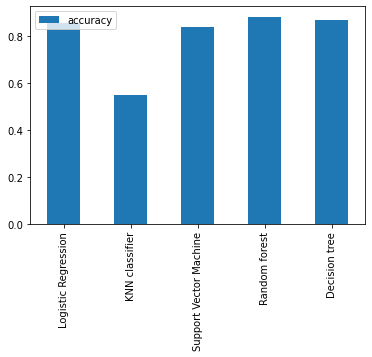

In [103]:
model_compare.T.plot(kind='bar') # (T is here for transpose)

## Yes, we can see that Random Forest has 1% better accuracy than Logistic regression

## but Random Forest is an overfitted model for training dataset because it had approx 100% accuracy but approx 87% accuracy for testing dataset it means there is quite difference between the training accuracy and testing accuracy so ,

##  so, we will select Logistic regression because it has good training and testing accuracy and also both values are very close to each other

# Feature importance

In [ ]:
# These “coef’s” tell how much and in what way did each one of them contribute to predicting the target variable

# Logistic regression

In [104]:
feature_dict= dict(zip(dataset.columns,list(lr.coef_[0])))
feature_dict

{'Unnamed: 0': -0.0003806839572804629,
 'Experience (YY.MM)': 0.09440925035593999,
 'Age in YY.': -0.0036416022606384412,
 'Stay/Left': 0.005862056121701414,
 'New Location': 0.19255662934818807,
 'New Promotion': 2.756838381231349,
 'New Job Role Match': -0.2253076535443092,
 'Agency': -0.10215859777247635,
 'Direct': 0.17063232664851943,
 'Employee Referral': 0.4506937096708389,
 'Marr.': -0.5881487612279966,
 'Single': -0.019378873111104436,
 'other status': -0.2149591572824194,
 'B1': 0.0886854467754658,
 'B2': -0.12894239599233642,
 'B3': 0.09838218183102572,
 'other group': -0.133485150846695,
 '< =1': -0.023348773821573694,
 '> 1 & < =3': -0.0430499677559949,
 'Operation': -0.004812072320752013,
 'Sales': -0.10897188459152056,
 'Support': 0.1012052926534925,
 'Female': -0.22996313289144021,
 'Male': -0.028076084430321495}

In [ ]:
# This is a type of Model-driven Exploratory data analysis.

In [ ]:
# Visualize feature importance

<AxesSubplot:title={'center':'Feature Importance'}>

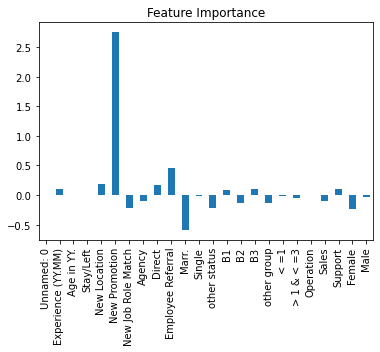

In [105]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind="bar",legend=False,title="Feature Importance")

In [ ]:
# As we can see that “New promotion” column has the highest feature importance.

In [106]:
# Saving the best model 

In [107]:
# Approach-1

In [108]:
# Logistic Regression model because it has the best accuracy as well it is neither overfitted nor under fitted

In [109]:
import pickle

# Save the trained model as a pickle string.
saved_model = pickle.dumps(lr)

# Load the pickled model
lr_from_pickle = pickle.loads(saved_model)

# Use the loaded pickled model to make predictions
lr_from_pickle.predict(X_test)

array(['Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Left',
       'Stay', 'Left', 'Stay', 'Stay', 'Left', 'Left', 'Stay', 'Left',
       'Left', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Left',
       'Left', 'Stay', 'Stay', 'Left', 'Stay', 'Stay', 'Stay', 'Stay',
       'Stay', 'Left', 'Stay', 'Stay', 'Left', 'Stay', 'Stay', 'Stay',
       'Left', 'Stay', 'Stay', 'Left', 'Stay', 'Left', 'Stay', 'Stay',
       'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Left', 'Stay',
       'Stay', 'Stay', 'Left', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay',
       'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Left', 'Left', 'Stay',
       'Stay', 'Stay', 'Stay', 'Left', 'Left', 'Stay', 'Left', 'Left',
       'Stay', 'Stay', 'Left', 'Stay', 'Stay', 'Stay', 'Stay', 'Left',
       'Stay', 'Stay', 'Left', 'Stay', 'Stay', 'Left', 'Stay', 'Stay',
       'Left', 'Left', 'Stay', 'Stay', 'Left', 'Stay', 'Stay', 'Stay',
       'Stay', 'Left', 'Left', 'Stay', 'Stay', 'Stay', 'Left', 'Left',
      

In [110]:
# Approach – 2

In [111]:
# loading dependency
import joblib

# saving our model - model - model , filename - model_lr
joblib.dump(lr , 'model_lr')

# opening the file- model_jlib
m_jlib = joblib.load('model_lr')

# check prediction
m_jlib.predict(X_test) # similar output

array(['Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Left',
       'Stay', 'Left', 'Stay', 'Stay', 'Left', 'Left', 'Stay', 'Left',
       'Left', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Left',
       'Left', 'Stay', 'Stay', 'Left', 'Stay', 'Stay', 'Stay', 'Stay',
       'Stay', 'Left', 'Stay', 'Stay', 'Left', 'Stay', 'Stay', 'Stay',
       'Left', 'Stay', 'Stay', 'Left', 'Stay', 'Left', 'Stay', 'Stay',
       'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Left', 'Stay',
       'Stay', 'Stay', 'Left', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay',
       'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Left', 'Left', 'Stay',
       'Stay', 'Stay', 'Stay', 'Left', 'Left', 'Stay', 'Left', 'Left',
       'Stay', 'Stay', 'Left', 'Stay', 'Stay', 'Stay', 'Stay', 'Left',
       'Stay', 'Stay', 'Left', 'Stay', 'Stay', 'Left', 'Stay', 'Stay',
       'Left', 'Left', 'Stay', 'Stay', 'Left', 'Stay', 'Stay', 'Stay',
       'Stay', 'Left', 'Left', 'Stay', 'Stay', 'Stay', 'Left', 'Left',
      